## Lab 9 by Abijith Suresh km

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with

In [64]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [65]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [66]:
print(f'Image DType: {type(x_train)}')
print(f'Image Element DType: {type(x_train[0,0,0])}')
print(f'Label Element DType: {type(y_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {x_train.shape}')
print(f'Labels: {y_train.shape}')
print('Test Data:') 
print(f'Images: {x_test.shape}')
print(f'Labels: {y_test.shape}')
print('Image Data Range:')
print(f'Min: {x_train.min()}')
print(f'Max: {x_train.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


- The training set contains 60,000 images of size 28x28 pixels, and the test set contains 10,000 images of the same size.



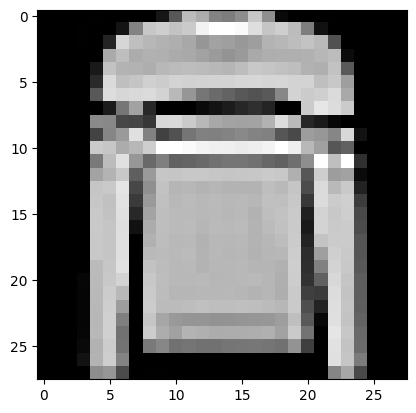

In [67]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap='gray')  # Plotting the image from the training set. "cmap = gray" which means the image plotting is in Grayscale.

In [68]:
# Reshaping the image data to flatten each image from a 2D array of shape (28, 28) to a 1D array of shape (28 * 28) before using it for training and testing.
#This reshaping is commonly done in machine learning tasks, especially when using certain algorithms that require the data to be in a 2D format.

train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

After reshaping the train_images and test_images to have a shape of (60000, 784) and (10000, 784), respectively, the provided code snippet further processes the image data by converting the pixel values to floating-point numbers and normalizing them to the range [0, 1].

In [69]:
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [70]:
# Define the input layer
inputs = tf.keras.Input(shape=(784,))  # Assuming each image has a shape of (28, 28) when flattened

# Define the first hidden layer
hidden_layer = tf.keras.layers.Dense(128, activation='relu')(inputs)

# Define the output layer
outputs = tf.keras.layers.Dense(10)(hidden_layer)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
# Training the model
model.fit(train_images, y_train, epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.8107
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8588
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8713
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8785
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.8861
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.8886
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8943
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.8973
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9025
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2600 - accuracy: 0.9046

In [73]:
test_acc = model.evaluate(test_images,  y_test, verbose=2)

313/313 - 0s - loss: 0.3221 - accuracy: 0.8847 - 436ms/epoch - 1ms/step


softmax is adding to get the probablity for each class.

In [79]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

y_argmax_prediction = np.argmax(predictions, axis=1)
print(y_argmax_prediction)

#confusion matrix to show the precision and recall
confusion_matrix(y_test, y_argmax_prediction)


313/313 [==============================] - 0s 1ms/step
[9 2 1 ... 8 1 5]


array([[869,   0,   9,  19,   4,   0,  90,   1,   8,   0],
       [  3, 972,   0,  17,   3,   0,   4,   0,   1,   0],
       [ 24,   0, 779,  12, 107,   0,  78,   0,   0,   0],
       [ 25,   7,   8, 890,  43,   0,  25,   0,   2,   0],
       [  0,   0,  83,  29, 830,   0,  58,   0,   0,   0],
       [  0,   0,   0,   1,   0, 964,   0,  21,   1,  13],
       [149,   2,  74,  23,  79,   0, 668,   0,   5,   0],
       [  0,   0,   0,   0,   0,  15,   0, 961,   0,  24],
       [  7,   0,   3,   7,   5,   2,   9,   5, 962,   0],
       [  0,   0,   0,   0,   0,  10,   1,  37,   0, 952]], dtype=int64)

In [80]:
# Class names for visualization
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Explore specific examples of incorrect classifications
incorrect_indices = np.where(y_argmax_prediction != y_test)[0]
num_examples = 3


Examples of Incorrect Classifications:
Predicted: Sandal, True: Sneaker, Confidence: 700.00%


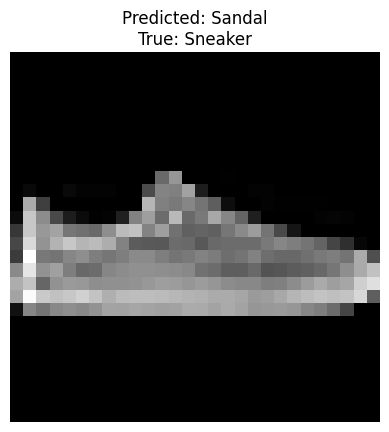

Predicted: Pullover, True: Coat, Confidence: 400.00%


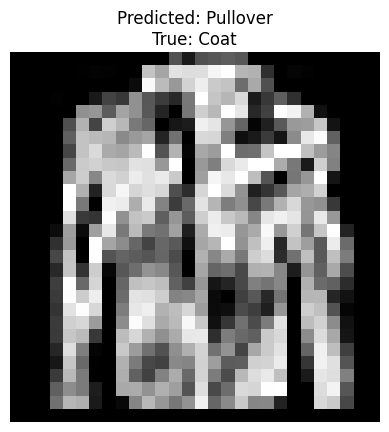

Predicted: Sandal, True: Ankle boot, Confidence: 900.00%


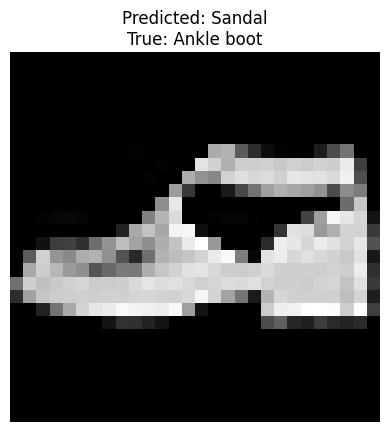

In [82]:
print("\nExamples of Incorrect Classifications:")
for i in range(num_examples):
    idx = incorrect_indices[i]
    predicted_class = class_names[y_argmax_prediction[idx]]
    true_class = class_names[y_test[idx]]
    confidence = np.max(y_test[idx]) * 100
    print(f"Predicted: {predicted_class}, True: {true_class}, Confidence: {confidence:.2f}%")
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}\nTrue: {true_class}")
    plt.axis('off')
    plt.show()